In [14]:
import numpy
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow
import keras
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
# source_file = '../../Data/process/resultDados_patio1_completo.csv'
# open_file = '../../Data/process/patio1_PosicaoVento.csv'
open_file1 = '../../Data/process/teste_02_PosicaoVento_Verif.csv'
dataframe = pd.read_csv(open_file1, delimiter=',',  index_col=0, parse_dates=['Data'])


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Longitude          8760 non-null   float64       
 1   Latitude           8760 non-null   float64       
 2   Data               8760 non-null   datetime64[ns]
 3   Magnitude_Verif    8760 non-null   float64       
 4   pressao_Verif      8760 non-null   float64       
 5   Temperatura_Verif  8760 non-null   float64       
 6   Direcao_Verif      8760 non-null   float64       
 7   PosicaoVento       8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 615.9+ KB


In [17]:
dataframe.head()

,Longitude,Latitude,Data,Magnitude_Verif,pressao_Verif,Temperatura_Verif,Direcao_Verif,PosicaoVento
0,-42.75,-14.25,2017-01-01 00:00:00,9.82,884.46,19.54,119.7170,SE
1,-42.75,-14.25,2017-01-01 01:00:00,8.74,882.33,18.52,119.2000,SE
2,-42.75,-14.25,2017-01-01 02:00:00,8.45,882.00,17.63,120.9835,SE
3,-42.75,-14.25,2017-01-01 03:00:00,9.18,882.00,16.92,119.7170,SE
4,-42.75,-14.25,2017-01-01 04:00:00,9.19,882.67,16.48,116.7170,SE


In [18]:
dataframe.shape

(8760, 8)

In [19]:
dataframe = dataframe.drop(dataframe[dataframe.Data > '2017-11-01 00:00:00'].index)
dataframe.shape

(7297, 8)

In [20]:
df_day = dataframe[['Data', 'Magnitude_Verif','Temperatura_Verif','pressao_Verif','Direcao_Verif']].groupby('Data').mean()
df_day.head(2)

,Magnitude_Verif,Temperatura_Verif,pressao_Verif
Data,,,
2017-01-01 00:00:00,9.82,19.54,884.46
2017-01-01 01:00:00,8.74,18.52,882.33


fig = pyplot.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
_ = df_day.plot(y='Magnitude_Verif', ax=ax2, lw=1, marker='o', color='blue', alpha=0.5)
_ = df_day.plot(y='Valor_Temp', ax=ax, lw=1, marker='o', color='red', alpha=0.75)
_ = ax.grid()

In [21]:
df_day['V_d1'] = df_day['Magnitude_Verif'].shift(-1)
df_day['V_l1'] = df_day['Magnitude_Verif'].shift(1)
df_day['V_l2'] = df_day['Magnitude_Verif'].shift(2)
df_day['V_l3'] = df_day['Magnitude_Verif'].shift(3)
df_day['D_l1'] = df_day['Direcao_Verif'].shift(1)
df_day['D_l2'] = df_day['Direcao_Verif'].shift(2)
df_day['D_l3'] = df_day['Direcao_Verif'].shift(3)
df_day['T_l1'] = df_day['Temperatura_Verif'].shift(1)
df_day['T_l2'] = df_day['Temperatura_Verif'].shift(2)
df_day['T_l3'] = df_day['Temperatura_Verif'].shift(3)
df_day['P_l1'] = df_day['pressao_Verif'].shift(1)
df_day['P_l2'] = df_day['pressao_Verif'].shift(2)
df_day['P_l3'] = df_day['pressao_Verif'].shift(3)
#df_day['C_l1'] = df_day['Valor_Chuva'].shift(1)
#df_day['C_l2'] = df_day['Valor_Chuva'].shift(2)
#df_day['C_l3'] = df_day['Valor_Chuva'].shift(3)
complete_cases = ~df_day.isna().any(axis=1)
dfn = df_day[complete_cases]

In [22]:
df_day

,Magnitude_Verif,Temperatura_Verif,pressao_Verif,V_d1,V_l1,V_l2,V_l3,T_l1,T_l2,T_l3,P_l1,P_l2,P_l3
Data,,,,,,,,,,,,,
2017-01-01 00:00:00,9.82,19.54,884.46,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,8.74,18.52,882.33,8.45,9.82,NaN,NaN,19.54,NaN,NaN,884.46,NaN,NaN
2017-01-01 02:00:00,8.45,17.63,882.00,9.18,8.74,9.82,NaN,18.52,19.54,NaN,882.33,884.46,NaN
2017-01-01 03:00:00,9.18,16.92,882.00,9.19,8.45,8.74,9.82,17.63,18.52,19.54,882.00,882.33,884.46
2017-01-01 04:00:00,9.19,16.48,882.67,9.36,9.18,8.45,8.74,16.92,17.63,18.52,882.00,882.00,882.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31 20:00:00,1.78,26.13,880.33,3.60,2.01,2.34,2.77,26.37,26.75,27.77,880.00,879.00,878.17
2017-10-31 21:00:00,3.60,25.92,881.00,4.41,1.78,2.01,2.34,26.13,26.37,26.75,880.33,880.00,879.00
2017-10-31 22:00:00,4.41,25.37,881.17,5.20,3.60,1.78,2.01,25.92,26.13,26.37,881.00,880.33,880.00


In [23]:
# TRAINING
n_test_samples = 30
n_validation_samples = 30
random_seed = 32

# SET THE RANDOM SEED
numpy.random.seed(random_seed)
tensorflow.random.set_seed(random_seed)

x_cols = ['Magnitude_Verif', 'V_l1','V_l2','V_l3',  'T_l1','T_l2','T_l3'  , 'D_l1','D_l2','D_l3',  'P_l1','P_l2','P_l3'] #
y_cols = ['V_d1']

# SAMPLING
X_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][x_cols].to_numpy()
X_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][x_cols].to_numpy()
X_tst = dfn[x_cols].to_numpy()
Y_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][y_cols].to_numpy()
Y_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][y_cols].to_numpy()

# SCALING X
X_scaler = StandardScaler()
X_scaler = X_scaler.fit(X_trn)
X_trn_scaled = X_scaler.transform(X_trn)
X_val_scaled = X_scaler.transform(X_val)
X_tst_scaled = X_scaler.transform(X_tst)

# SCALING Y
Y_scaler = StandardScaler()
Y_scaler = Y_scaler.fit(Y_trn)
Y_trn_scaled = Y_scaler.transform(Y_trn)
Y_val_scaled = Y_scaler.transform(Y_val)

# DECLARE NET
max_neurons = 20
PATIENCE = 250
MAX_EPOCHS = 10*PATIENCE
LEARNING_RATE = 0.01
HIDDEN_ACTIVATION = 'relu'
MODEL_LOSS = 'val_loss'
MIN_IMPROVEMENT = 0.025

best_loss = 1000.0
best_val_loss = 1000.0
training_result_list = []
for n_neurons in numpy.arange(max_neurons) + 1:
    inputs = keras.Input(shape=(X_trn_scaled.shape[1]))
    hidden = keras.layers.Dense(n_neurons, activation=HIDDEN_ACTIVATION)(inputs)
    outputs = keras.layers.Dense(Y_trn_scaled.shape[1], activation='linear')(hidden)
    model_name = 'FORECAST_{}_{}'.format(HIDDEN_ACTIVATION, n_neurons)
    my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
    my_net.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')
    es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=PATIENCE, restore_best_weights=True)
    history = my_net.fit(X_trn_scaled, Y_trn_scaled, epochs=MAX_EPOCHS, validation_data=(X_val_scaled, Y_val_scaled), batch_size=X_trn_scaled.shape[0], callbacks=[es_callback], verbose=0)
    model_loss = history.history['loss'][-1]
    model_val_loss = history.history['val_loss'][-1]
    epochs = len(history.history['val_loss'])

    has_improved_val_loss = False
    loss_improvement = 1.0 - model_val_loss/best_val_loss

    if loss_improvement >= MIN_IMPROVEMENT:
        is_best_net = ((model_loss <= best_loss) & (model_val_loss < best_val_loss))

        if is_best_net:
                best_loss = model_loss
                best_val_loss = model_val_loss
                best_net = my_net
                best_history = history
                best_text = '***BEST NET!***'
                improvement_text = '{:.0f}% GAIN'.format(100.0*loss_improvement)
                best_name = model_name
                best_epochs = epochs
        else:
            best_text = ''
            improvement_text = ''
    else:
        print('EXTRA NEURON DIDNT IMPROVE NET {:.0f}% GAIN'.format(100.0*loss_improvement))
        break
    result_dict = {'model_name': model_name, 'epochs': epochs, 'model_loss': model_loss, 'model_val_loss': model_val_loss, 'best_net':is_best_net}
    training_result_list.append(result_dict)
    print('{} RESULTS > EPOCHS: {} LOSS: {:.3f} VAL_LOSS: {:.3f} {} {}'.format(model_name, epochs, model_loss, model_val_loss, best_text, improvement_text)) 

FORECAST_relu_1 RESULTS > EPOCHS: 2500 LOSS: 0.092 VAL_LOSS: 0.147 ***BEST NET!*** 100% GAIN
EXTRA NEURON DIDNT IMPROVE NET -4% GAIN


In [24]:
Y_est_scaled = best_net.predict(X_tst_scaled)
Y_est = Y_scaler.inverse_transform(Y_est_scaled)
df_day.loc[complete_cases, ['Y_est']] = Y_est
df_day['residual'] = df_day['Y_est'] - df_day['V_d1']
df_day['rabs'] = df_day['residual'].abs()
model_r2_score = r2_score(df_day.loc[complete_cases, 'V_d1'].to_numpy(), df_day.loc[complete_cases, 'Y_est'].to_numpy())

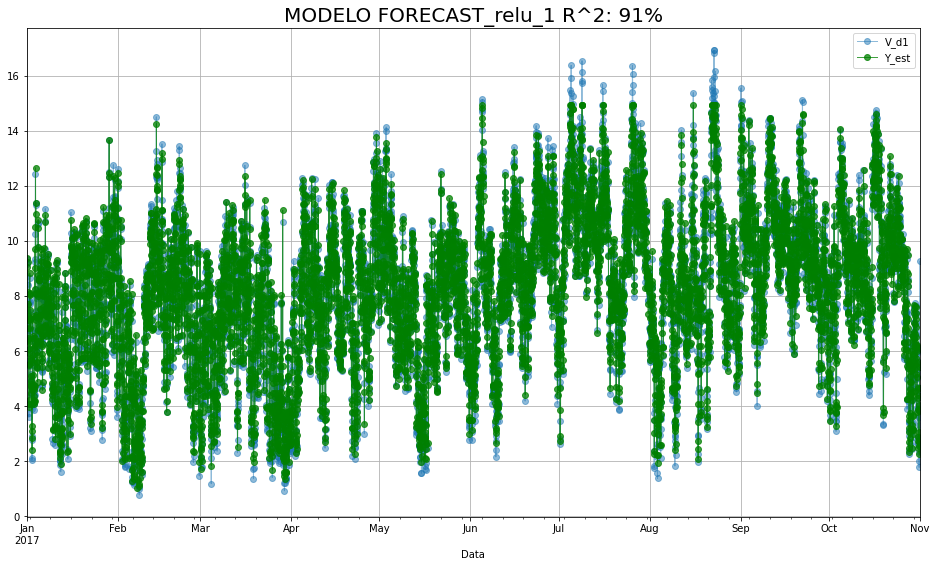

In [25]:
fig = pyplot.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
_ = df_day.plot(y='V_d1', ax=ax, lw=1, marker='o', alpha=0.5)
_ = df_day.plot(y='Y_est', ax=ax, lw=1, marker='o', alpha=0.75, color='green')
_ = ax.grid()
_ = ax.set_title('MODELO {} R^2: {:.0f}%'.format(best_name, 100.0*model_r2_score), size=20)

In [26]:
df_day.head(20)
# df_day.sort_values('rabs', ascending=True)

,Magnitude_Verif,Temperatura_Verif,pressao_Verif,V_d1,V_l1,V_l2,V_l3,T_l1,T_l2,T_l3,P_l1,P_l2,P_l3,Y_est,residual,rabs
Data,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,9.82,19.54,884.46,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,8.74,18.52,882.33,8.45,9.82,NaN,NaN,19.54,NaN,NaN,884.46,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,8.45,17.63,882.00,9.18,8.74,9.82,NaN,18.52,19.54,NaN,882.33,884.46,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,9.18,16.92,882.00,9.19,8.45,8.74,9.82,17.63,18.52,19.54,882.00,882.33,884.46,9.384780,0.194780,0.194780
2017-01-01 04:00:00,9.19,16.48,882.67,9.36,9.18,8.45,8.74,16.92,17.63,18.52,882.00,882.00,882.33,9.049690,-0.310310,0.310310
2017-01-01 05:00:00,9.36,15.98,883.00,8.40,9.19,9.18,8.45,16.48,16.92,17.63,882.67,882.00,882.00,9.244546,0.844546,0.844546
2017-01-01 06:00:00,8.40,15.80,883.50,7.40,9.36,9.19,9.18,15.98,16.48,16.92,883.00,882.67,882.00,8.153317,0.753317,0.753317
2017-01-01 07:00:00,7.40,16.58,884.00,7.83,8.40,9.36,9.19,15.80,15.98,16.48,883.50,883.00,882.67,7.296085,-0.533915,0.533915
2017-01-01 08:00:00,7.83,17.93,885.00,7.38,7.40,8.40,9.36,16.58,15.80,15.98,884.00,883.50,883.00,7.734834,0.354834,0.354834
